# "Azure Databricks and MLflow Tutorial"
> "In this post, I will show how to use Azure Databricks and MLflow to deploy a machine learning model."

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [databricks, mlflow, machine_learning, jupyter, ai]
- image: images/databricks.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

# Introduction

The dataset that I'll be using can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). 
The goal is to train, register and deploy an ML model that will perform a classification and predict whether a person has a heart disease or not.


# Cluster & Notebook Creation

## Cluster Creation

In Azure Databricks, under **Clusters**, click on **Create Cluster**.

You can use the following configuration or any other configuration depending on your business requirements.

![](https://github.com/aeidme/blog/raw/master/images/notebooks/cluster-creation.png)

After the cluster has been created, make sure it's running as follows:

![](https://github.com/aeidme/blog/raw/master/images/notebooks/cluster-running.png)

## Notebook Creation

Move back to the main dashboard and click on **New Notebook** under **Common Tasks**. There are also other ways to do that.

You will be prompted with this dialog.

![](https://github.com/aeidme/blog/raw/master/images/notebooks/nb-creation.png)

Make sure to select **Python** as the language and the cluster that was created in the previous step.


# Importing Data

The dataset that I'll be using can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

To import a file to Databricks notebook, select **File** -> **Upload Data** and follow the instructions. At the end, you will receive a **File Path**. Make sure to copy it and save it somewhere safe.

The file that I uploaded is called "**processed_cleveland.data**". It doesn't contain headers therefore I will:
1. Create a list of header names called **column_names**.
2. Use *header=None* and *names=column_names* with Panda's **read_csv()**.


In [1]:
import pandas as pd

column_names = ["age", "sex", "chest_pain", "resting_blood_pressure", "cholestoral", "fasting_blood_sugar", "rest_ECG", "maximum_heart_rate", "exercice_angina", "depression_ST", "slope_ST", "major_vessels", "thal", "y"]
data = pd.read_csv("/dbfs/FileStore/shared_uploads/username/processed_cleveland.data", header=None, names=column_names)

# Data Analysis & Preparation

The dataset contains 14 attributes of which one is the predicted attribute 'y'. There are some missing values denoted by '?' that I will deal with at a later stage.

In [2]:
data

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ECG,maximum_heart_rate,exercice_angina,depression_ST,slope_ST,major_vessels,thal,y
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Classes Distribution

I will plot the distribution of the classes that we have. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

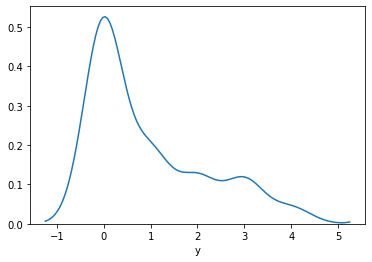

In [3]:
import seaborn as sns
sns.distplot(data.y, kde=True, hist=False)

## Transforming Labels

I will distinguish presence (values 1,2,3,4) from absence (value 0) of the disease. This can be done by changing the 'y' column.

In [4]:
disease = (data.y > 0).astype(int)
data.y = disease
data

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ECG,maximum_heart_rate,exercice_angina,depression_ST,slope_ST,major_vessels,thal,y
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Classes Distribution

After plotting the distribution, we can clearly see that the dataset is now balanced between positive and negative classes.

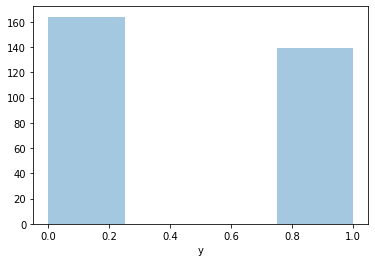

In [5]:
sns.distplot(data.y, kde=False)

## Correlation Plot

In order to plot the correlation matrix of the features, I will:

1. Use Panda's **corr()** function after dropping the label.
2. Use Seaborn's **heatmap()** function.

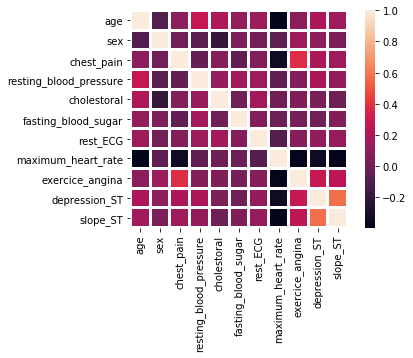

In [6]:
import numpy as np
# Compute the correlation matrix
corr = data.drop(["y"], axis=1).corr()
# Plot the correlation heatmap
sns.heatmap(corr, square=True, linewidths=2)

## Missing Values

The dataset has missing values denoted with '?'. I will drop all the rows containing such values.

In [7]:
data = data[~data.eq('?').any(1)]

/databricks/python/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 res_values = method(rvalues)

In [8]:
data

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ECG,maximum_heart_rate,exercice_angina,depression_ST,slope_ST,major_vessels,thal,y
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


## Splitting Dataset

Before training, I will split the dataset into train and test sub-datasets. This can be done using Scikit-Learn.

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=123)
X_train = train.drop(["y"], axis=1)
X_test = test.drop(["y"], axis=1)
y_train = train.y
y_test = test.y

## MLflow & Training

In this section, I will:
1. Create a random forest classifier using Scikit-Learn.
2. Use MLflow to keep track of the model metrics and save it for further usage.

The *predict* function of Scikit-Learn's **RandomForestClassifier** normally returns a binary classification (0 or 1). In our case, we need to use *predict_proba* when using MLflow. Therefore, I will created a wrapper around the model called **SklearnModelWrapper**.

A few things to note:
1. *mlflow.start_run()* creates a new MLflow run to track the performance of this model.
2. I will call *mlflow.log_param* to keep track of the number of trees in the forest.
3. I will call *mlflow.log_metric* to record the area under the ROC curve.

In [10]:
import mlflow
import mlflow.pyfunc
import mlflow.sklearn
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score 

class SklearnModelWrapper(mlflow.pyfunc.PythonModel):
  def __init__(self, model):
    self.model = model
    
  def predict(self, context, model_input):
    return self.model.predict_proba(model_input)[:,1]

with mlflow.start_run(run_name='untuned_random_forest'):
  n_estimators = 10
  model = RandomForestClassifier(n_estimators=n_estimators, random_state=np.random.RandomState(123))
  model.fit(X_train, y_train)
  # predict_proba returns [prob_negative, prob_positive], so slice the output with [:, 1]
  predictions_test = model.predict_proba(X_test)[:,1]
  auc_score = roc_auc_score(y_test, predictions_test)
  mlflow.log_param('n_estimators', n_estimators)
  mlflow.log_metric('auc', auc_score)
  wrappedModel = SklearnModelWrapper(model)
  mlflow.pyfunc.log_model("random_forest_model", python_model=wrappedModel)

## Feature Importance

In many business cases, it's important to interpret the models. Feature importances give us a clear idea of the important features that determines the prediction (in our case, whether a person has a heart disease or not).

A few conclusions can be drawn from this:
1. Number of major vessels, Thal and maximum heart rate play a huge role in determining whether the person has a disease or not.
2. Sex and ECG at rest aren't very important.

In [12]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns.tolist(), columns=['importance'])
feature_importances.sort_values('importance', ascending=False)

,importance
major_vessels,0.137448
thal,0.136005
maximum_heart_rate,0.124564
chest_pain,0.112531
depression_ST,0.094681
resting_blood_pressure,0.081680
age,0.074869
cholestoral,0.070291
exercice_angina,0.063679
slope_ST,0.054488


## Registering the model in the MLflow Model Registry

This step can be done using the UI or programmatically. However, I will do it using the following code.

First step is getting the *run_id* for the previously ran mlflow.

### Getting the run_id

In [13]:
run_id = mlflow.search_runs(filter_string='tags.mlflow.runName = "untuned_random_forest"').iloc[0].run_id

In [14]:
run_id

Out[14]: 'cd3d3adf7dd14604bc4dfa7ccd7b0c2d'

### Registering the model

In [15]:
model_name = "heart_disease"
model_version = mlflow.register_model(f"runs:/{run_id}/random_forest_model", model_name)

Successfully registered model 'heart_disease'.
Created version '1' of model 'heart_disease'.

Perform a sanity check by going to **Models**, you will be able to see the registered model as follows:

![](https://github.com/aeidme/blog/raw/master/images/notebooks/registered-model.png)

### Deploying to production

The next step is transitioning the model version to *Production*. This can be done using the MLflowClient as follows.

In [16]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
client.transition_model_version_stage(
  name=model_name,
  version=model_version.version,
  stage="Production"
)

Out[16]: <ModelVersion: creation_timestamp=1600846749789, current_stage='Production', description='', last_updated_timestamp=1600846969651, name='', run_id='cd3d3adf7dd14604bc4dfa7ccd7b0c2d', run_link='', source='dbfs:/databricks/mlflow/1633248018842760/cd3d3adf7dd14604bc4dfa7ccd7b0c2d/artifacts/random_forest_model', status='READY', status_message='', tags={}, user_id='5324587959825102', version='1'>

In [17]:
model = mlflow.pyfunc.load_model(f"models:/{model_name}/production")

# Sanity-check: This should match the AUC logged by MLflow
print(f'AUC: {roc_auc_score(y_test, model.predict(X_test))}')

AUC: 0.9067857142857142

This value matches the value that we got when running the experiment:

![](https://github.com/aeidme/blog/raw/master/images/notebooks/experiment-run.png)

# Conclusion

In this post, I showed how to use Azure Databricks and MLflow to train, monitor and deploy to Production an ML model. One can easily now serve the model and create a REST endpoint that can be used within any project.